# **Unveiling Film Tastes: A Personalized Movie Journey through Smart Recommendations.**







Group 2:

         Eric Lintari.
        Kamande Karigi.
        Lucy Waruguru.
        Victor Gachie.
        Cynthia Wanyeki.

Technical Mentor:  Diana Mong'ina.

Phase 4 Project: Recommendation System.

Deadline: 18th January 2024.

# **TABLE OF CONTENTS.**


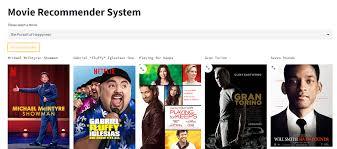

# **INTRODUCTION.**

The goal of this project is to delve into user behavior within the rise of movie streaming platforms and construct a model that enhances user engagement, ultimately leading to an enriched cinematic experience.

In today's digital age, online streaming has become the predominant avenue for accessing diverse cinematic content. The vastness of movie catalogs poses a challenge for users in selecting content tailored to their individual preferences. By comprehensively analyzing user behavior, we aim to build a recommendation system that simplifies the process of navigating through this cinematic maze, ensuring that users discover and enjoy movies that align closely with their tastes.

The significance of such a system lies in its potential to not only improve user satisfaction and retention but also to foster a dynamic and engaging movie-watching environment. Leveraging real-time project datasets sourced from platforms like [movielens](https://grouplens.org/datasets/movielens/latest/), our analysis will focus on a variety of user interactions, ratings, and viewing patterns to build a model that resonates with the diverse preferences of our audience. Through this project, we aspire to bring forth a personalized and enjoyable cinematic journey for each user.







# **BUSINESS UNDERSTANDING.**

The film industry boasts of a vast array of genres, ranging from action and drama to comedy, science fiction, horror, and beyond. Each genre caters to distinct tastes and moods, offering a rich tapestry of cinematic experiences. While this diversity is an advantage for movie enthusiasts, it also poses a challenge—the dilemma of choosing the perfect film from the extensive selection.

For users, navigating through this abundance of options can be a daunting task. The sheer volume of movies available makes decision-making overwhelming, especially when the goal is to ensure not just any watch but an enjoyable and satisfying cinematic experience. Consequently, businesses operating in this industry must delve into the complexities of user preferences to provide tailored recommendations and enhance the overall movie-watching experience.

# **PROBLEM STATEMENT.**

A streaming platform's success depends on how well it keeps users happy and interested. One big factor is the recommendation system – the feature that suggests movies for you to watch. This is crucial because there are so many movies on the platform, and everyone likes different things. It's like trying to find your way in a big, confusing maze.

People's taste in movies is very personal. What one person loves, another might not enjoy at all. So, predicting what movies a person will like is tricky. That's where our project comes in. We want to create a recommendation system that looks at what movies you've watched before, how you've rated them, and what other people who like similar things enjoyed. This way, we can suggest movies that match your taste, making it easier for you to discover and enjoy films that you'll probably love.







# **OBJECTIVES.**


1.	**Enhance User Experience:**
•	Increase user engagement by providing personalized movie recommendations.
•	Improve user satisfaction by suggesting movies aligned with individual tastes.


2.	**Increase User Retention:**
•	Retain users by offering a compelling and personalized movie-watching experience.
•	Encourage users to spend more time on the platform through relevant recommendations.


3.	**Drive Revenue:**
•	Increase the consumption of movies by recommending content that aligns with users' interests.
•	Potentially increase revenue through ad views or premium subscriptions.


# **SOURCE OF DATA.**


The data used was sourced from [MovieLens](https://grouplens.org/datasets/movielens/latest/). We used the small dataset due to limited computational power. We selected the four files in line with project objectives.


 **Movies.csv:** Contains information about the movies.


movieId - Unique identifier for each movie.

title - The movie titles.

genre - The various genres a movie falls into.

**Links.csv:**

•	Columns: movieId, imdbId, tmdbId

•	Insights:
•	movieId is likely the key that can be used to link this DataFrame with other DataFrames.
•	imdbId and tmdbId could be useful for external references to IMDb and TMDB.


**Ratings.csv:**

•	Columns: userId, movieId, rating, timestamp

•	Insights:
•	userId and movieId are crucial for identifying users and movies.

•	rating represents the user's rating for a movie.

•	timestamp indicates when the rating was given.


**Tags.csv:**

•	Columns: userId, movieId, tag, timestamp

•	Insights:
•	Similar structure to the Ratings DataFrame.

•	Additional information in the form of tags, providing more context about movies.

•	The tag column is of type object (likely string), which contains textual information.


# **IMPORTING LIBRARIES.**

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy import stats
import seaborn as sns
!pip install scikit-surprise
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans
from surprise import SVD
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162669 sha256=ba757f624829a989180cd25fae6025ecfd565699d696e9667bd1ad17a3ff605e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**Loading Datasets.**

In [2]:
#Loading and reading the datasets.

# List of CSV files along with corresponding column names
csv_files_and_columns = [
    ('movies.csv', ['movieId', 'title', 'genres']),
    ('links.csv', ['movieId', 'imdbId', 'tmdbId']),
    ('tags.csv', ['userId', 'movieId', 'tag', 'timestamp']),
    ('ratings.csv', ['userId', 'movieId', 'rating', 'timestamp'])
]

# Dictionary to store DataFrames
dataframes = {}

# Loop through each CSV file and its corresponding columns
for csv_file, columns in csv_files_and_columns:
    # Extract the DataFrame name from the file name (remove extension)
    df_name = csv_file.split('.')[0]

    # Read the CSV file into a DataFrame with specified column names
    dataframes[df_name] = pd.read_csv(csv_file, delimiter=',', header=0, names=columns, skipinitialspace=True)

# Access the DataFrames using keys
movies_df = dataframes['movies']
links_df = dataframes['links']
tags_df = dataframes['tags']
ratings_df = dataframes['ratings']

# Print the head of each DataFrame
for df_name, df in dataframes.items():
    print(f"\n{df_name}_df:")
    print(df.head())



movies_df:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

links_df:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

tags_df:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2   

All Datasets have a common column, movieID. This will be used in the merging of the datasets.

# **Data Understanding.**

In [3]:
# Display information for each dataset
print("Movies DataFrame:")
print("Shape:", movies_df.shape)
print(movies_df.info())
print("\n")

print("Ratings DataFrame:")
print("Shape:", ratings_df.shape)
print(ratings_df.info())
print("\n")

print("Tags DataFrame:")
print("Shape:", tags_df.shape)
print(tags_df.info())
print("\n")

print("Links DataFrame:")
print("Shape:", links_df.shape)
print(links_df.info())

Movies DataFrame:
Shape: (9742, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


Ratings DataFrame:
Shape: (100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Tags DataFrame:
Shape: (3683, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null 

**Movies Dataframe:**

Rows-9742

Columns-3


**Ratings Dataframe:**

Rows-100,836

Columns-4


**Links Dataframe:**

Rows-9742

Columns-3


**Tags Dataframe:**

Rows-3683

Columns-4

Check for Datatypes of each column.

In [4]:
# Function to count numerical and categorical variables
def count_variable_types(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    return len(numerical_cols), len(categorical_cols)

# Display counts for each dataset
movies_numerical, movies_categorical = count_variable_types(movies_df)
links_numerical, links_categorical = count_variable_types(links_df)
ratings_numerical, ratings_categorical = count_variable_types(ratings_df)
tags_numerical, tags_categorical = count_variable_types(tags_df)

# Print results
print(f"Movies Dataset - Numerical Variables: {movies_numerical}, Categorical Variables: {movies_categorical}")
print(f"Links Dataset - Numerical Variables: {links_numerical}, Categorical Variables: {links_categorical}")
print(f"Ratings Dataset - Numerical Variables: {ratings_numerical}, Categorical Variables: {ratings_categorical}")
print(f"Tags Dataset - Numerical Variables: {tags_numerical}, Categorical Variables: {tags_categorical}")


Movies Dataset - Numerical Variables: 1, Categorical Variables: 2
Links Dataset - Numerical Variables: 3, Categorical Variables: 0
Ratings Dataset - Numerical Variables: 4, Categorical Variables: 0
Tags Dataset - Numerical Variables: 3, Categorical Variables: 1


**Movies Dataset:**

Numerical Variables: 1 (movieId)

Categorical Variables: 2 (title and genres)


**Links Dataset:**

Numerical Variables: 3 (movieId, imdbId, tmdbId)

Categorical Variables: 0



**Ratings Dataset:**

Numerical Variables: 4 (userId, movieId, rating, timestamp)

Categorical Variables: 0


**Tags Dataset:**

Numerical Variables: 3 (userId, movieId, timestamp)

Categorical Variables: 1 (tag)

Merging Datsets.

In [5]:
# Merge movies_df with links_df
merged_df = pd.merge(movies_df, links_df, on='movieId', how='left') #to combine general movie information with additional details.

# Merge the result with tags_df
merged_df = pd.merge(merged_df, tags_df, on='movieId', how='left')  #to incorporate tags.

# Merge the final result with ratings_df
final_merged_df = pd.merge(merged_df, ratings_df, on='movieId', how='left')  #to include user ratings.

# Create a new DataFrame by copying the final merged DataFrame
new_df = final_merged_df.copy()

# Display information, data types, and the first few rows of the new DataFrame
print("Info for new DataFrame:")
print(new_df.info())

# Display data types of each column
print("\nData Types of Columns:")
print(new_df.dtypes)

# Display the first few rows of the new DataFrame
print("\nFirst few rows of new DataFrame:")
print(new_df.head())



Info for new DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   imdbId       285783 non-null  int64  
 4   tmdbId       285770 non-null  float64
 5   userId_x     233234 non-null  float64
 6   tag          233234 non-null  object 
 7   timestamp_x  233234 non-null  float64
 8   userId_y     285762 non-null  float64
 9   rating       285762 non-null  float64
 10  timestamp_y  285762 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 26.2+ MB
None

Data Types of Columns:
movieId          int64
title           object
genres          object
imdbId           int64
tmdbId         float64
userId_x       float64
tag             object
timestamp_x    float64
userId_y       float64
rating 

The merged dataframe has:

Rows-285,783.

Columns-11.

Numerical Variables-8. (movieID, imdbID, tmdbID, UserID_X, timestamp_x, UserID_y, timestamp_y, rating.)

Categorical Variables-3. (title, genre, tag.)

Renaming the Columns with similar names to avoid confusion.

In [6]:
# Rename the first set of columns from tags dataframe.
new_df = new_df.rename(columns={'userId_x': 'tags_userId', 'timestamp_x': 'tags_timestamp'})

# Rename the second set of columns from ratings dataframe.
new_df = new_df.rename(columns={'userId_y': 'ratings_userId', 'timestamp_y': 'ratings_timestamp'})
new_df.rename


<bound method DataFrame.rename of         movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
285778   193581  Black Butler: Book of the Atlantic (2017)   
285779   193583               No Game No Life: Zero (2017)   
285780   193585                               Flint (2017)   
285781   193587        Bungo Stray Dogs: Dead Apple (2018)   
285782   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres   imdbId    tmdbId  \
0       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
1       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   

In [7]:
# info of the new dataframe.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movieId            285783 non-null  int64  
 1   title              285783 non-null  object 
 2   genres             285783 non-null  object 
 3   imdbId             285783 non-null  int64  
 4   tmdbId             285770 non-null  float64
 5   tags_userId        233234 non-null  float64
 6   tag                233234 non-null  object 
 7   tags_timestamp     233234 non-null  float64
 8   ratings_userId     285762 non-null  float64
 9   rating             285762 non-null  float64
 10  ratings_timestamp  285762 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 26.2+ MB


In [8]:
# summary statistics for the new dataframe.
new_df.describe()

,movieId,imdbId,tmdbId,tags_userId,tags_timestamp,ratings_userId,rating,ratings_timestamp
count,285783.000000,2.857830e+05,285770.000000,233234.000000,2.332340e+05,285762.000000,285762.000000,2.857620e+05
mean,14927.663741,2.956050e+05,12797.315320,470.681354,1.384754e+09,313.894279,3.841270,1.214707e+09
std,31402.673519,5.150156e+05,43479.255523,153.324249,1.534705e+08,179.451387,1.020798,2.233730e+08
min,1.000000,4.170000e+02,2.000000,2.000000,1.137179e+09,1.000000,0.500000,8.281246e+08
25%,296.000000,1.098300e+05,489.000000,424.000000,1.242494e+09,160.000000,3.000000,1.019133e+09
50%,1721.000000,1.125730e+05,680.000000,477.000000,1.457901e+09,314.000000,4.000000,1.211377e+09
75%,5673.000000,2.415270e+05,8963.000000,599.000000,1.498457e+09,465.000000,4.500000,1.445346e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,1.537099e+09,610.000000,5.000000,1.537799e+09


The dataset seems to cover a diverse range of movies, users, and timestamps.

Ratings exhibit a moderate spread, with a mean around 3.84, indicating that, on average, movies are rated relatively positively.

The temporal distribution of tags and ratings spans a significant period, as indicated by the timestamp statistics.

# **DATA CLEANING.**

Check missing values, outliers, duplicates, inconsistencies, memory optimization, and correct data types.

In [9]:
# Check for missing values
missing_values = new_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers (assuming numeric columns)
numeric_columns = new_df.select_dtypes(include=[np.number]).columns
outliers = new_df[numeric_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std())
print("\nOutliers:\n", outliers.sum())

# Check for duplicates
duplicates = new_df.duplicated().sum()
print("\nDuplicates:", duplicates)

# Check for inconsistencies or errors (in genres)
# Assuming genres column has pipe-separated values
inconsistent_genres = new_df['genres'].apply(lambda x: '|' in x)
print("\nInconsistent Genres:", inconsistent_genres.sum())

# Optimize memory usage
new_df_optimized = new_df.copy()
for col in new_df_optimized.columns:
    if new_df_optimized[col].dtype == 'object':
        new_df_optimized[col] = new_df_optimized[col].astype('category')

# Display information after optimization
print("\nOptimized DataFrame:")
print("Shape:", new_df_optimized.shape)
print(new_df_optimized.info())

# Ensure correct data types for each column
# Convert timestamp columns to datetime
timestamp_columns = ['tags_timestamp', 'ratings_timestamp']
new_df_optimized[timestamp_columns] = new_df_optimized[timestamp_columns].apply(pd.to_datetime, unit='s')

# Display information after ensuring correct data types
print("\nDataFrame with Correct Data Types:")
print(new_df_optimized.info())


Missing Values:
 movieId                  0
title                    0
genres                   0
imdbId                   0
tmdbId                  13
tags_userId          52549
tag                  52549
tags_timestamp       52549
ratings_userId          21
rating                  21
ratings_timestamp       21
dtype: int64

Outliers:
 movieId              7998
imdbId               6811
tmdbId               7420
tags_userId           386
tags_timestamp          0
ratings_userId          0
rating               2896
ratings_timestamp       0
dtype: int64

Duplicates: 0

Inconsistent Genres: 261486

Optimized DataFrame:
Shape: (285783, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   movieId            285783 non-null  int64   
 1   title              285783 non-null  category
 2   genres             285783 non-null  ca

**Missing Values:**

Missing values were identified in several columns (tmdbId, tags_userId, tag, tags_timestamp, ratings_userId, rating, ratings_timestamp).
Imputation strategies were suggested, such as filling numeric columns with mean values, categorical columns with a placeholder, and timestamp columns with a specific date.


**Outliers:**

Outliers were detected in various numeric columns (movieId, imdbId, tmdbId, tags_userId, rating).
Further investigation and treatment of outliers were recommended based on the nature of the data.


**Duplicates:**

No duplicates were found in the dataset.


**Inconsistent Genres:**

A large number of entries were identified as having inconsistent genres.
A manual examination and cleaning strategy were suggested to standardize genre entries.


**Memory Optimization:**

Memory optimization was performed by converting object-type columns to the category, resulting in a reduced memory footprint.


**Data Types:**

Correct data types were ensured for each column, such as converting timestamp columns to datetime.


The dataset has been preprocessed and is now ready for further analysis(EDA).


Handle  missing values, outliers, duplicates and inconsistencies.

In [10]:
# Handle Missing Values
new_df = new_df.dropna()

# Handle Outliers (for the 'rating' column)
from scipy.stats import zscore

z_scores = zscore(new_df['rating'])
outliers = (z_scores > 3) | (z_scores < -3)
new_df = new_df[~outliers]

# Handle Inconsistent Genres
new_df['genres'] = new_df['genres'].str.split('|')
unique_genres = set()
for genres_list in new_df['genres']:
    unique_genres.update(genres_list)

# One-Hot Encoding for Genres
for genre in unique_genres:
    new_df[genre] = new_df['genres'].apply(lambda x: 1 if genre in x else 0)

# Display the information about the cleaned dataset
print("Info for Cleaned Dataset:")
print(new_df.info())



Info for Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 227584 entries, 0 to 285773
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieId             227584 non-null  int64  
 1   title               227584 non-null  object 
 2   genres              227584 non-null  object 
 3   imdbId              227584 non-null  int64  
 4   tmdbId              227584 non-null  float64
 5   tags_userId         227584 non-null  float64
 6   tag                 227584 non-null  object 
 7   tags_timestamp      227584 non-null  float64
 8   ratings_userId      227584 non-null  float64
 9   rating              227584 non-null  float64
 10  ratings_timestamp   227584 non-null  float64
 11  Thriller            227584 non-null  int64  
 12  Animation           227584 non-null  int64  
 13  IMAX                227584 non-null  int64  
 14  Film-Noir           227584 non-null  int64  
 15  Horror  



 Rows: 227,584

Columns: 31

**Data Types:**

Numerical : 8
Categorical: 3




The preprocessing steps have resulted in a cleaned dataset with no missing values, handled outliers in the rating column, and transformed the genres column into a more usable format with one-hot encoding for each genre. The dataset is ready for further analysis and the development of a recommendation system.

Dealing with the genre column.

We decided to keep the first genre, with the assumption that the first genre listed is the most important genre.

In [11]:
# Keep only the desired columns
selected_columns = ['movieId', 'title', 'genres', 'imdbId', 'tmdbId', 'tags_userId', 'tag', 'tags_timestamp', 'ratings_userId', 'rating', 'ratings_timestamp']
cleaned_df = new_df[selected_columns].copy()

# Handle Genres (Keep only the first genre)
cleaned_df['genres'] = cleaned_df['genres'].astype(str).apply(lambda x: x.split('|')[0] if '|' in x else x)

# Display information about the cleaned DataFrame
print("Info for Cleaned Dataset:")
print(cleaned_df.info())



Info for Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 227584 entries, 0 to 285773
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movieId            227584 non-null  int64  
 1   title              227584 non-null  object 
 2   genres             227584 non-null  object 
 3   imdbId             227584 non-null  int64  
 4   tmdbId             227584 non-null  float64
 5   tags_userId        227584 non-null  float64
 6   tag                227584 non-null  object 
 7   tags_timestamp     227584 non-null  float64
 8   ratings_userId     227584 non-null  float64
 9   rating             227584 non-null  float64
 10  ratings_timestamp  227584 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ MB
None


Rows- 227,584.

Columns-11.


The dataset has been cleaned, with missing values handled, outliers removed from the rating column, and the genres column simplified to only keep the first genre. The memory usage has also been reduced from the original dataset. The cleaning process aims to prepare the data for further analysis or model building.

Checking Placeholders.

eg, NAN, NULL.

In [12]:
# confirming the absence of placeholders in my dataframe.

# Numeric placeholder values.
placeholders_count = {}

# Loop through each column in the dataset
for column in cleaned_df.columns:
    # Count occurrences of unique values in each column
    value_counts = cleaned_df[column].value_counts()

    # Check if there are any placeholder values (e.g., NaN, 'Unknown', NULL.)
    # and store the count in the placeholders_count dictionary
    if pd.NA in value_counts:
        placeholders_count[column] = value_counts[pd.NA]

# Display the count of placeholders for each column
for column, count in placeholders_count.items():
    print(f"Column '{column}' has {count} placeholder values.")



# Non-numeric placeholder values.
placeholders_count = {}

# Loop through each column in the dataset
for column in cleaned_df.columns:
    # Check for non-numeric placeholder values (NaN)
    count_nan = cleaned_df[column].isna().sum()

    # Store the count in the placeholders_count dictionary
    if count_nan > 0:
        placeholders_count[column] = count_nan

# Display the count of placeholders for each column
for column, count in placeholders_count.items():
    print(f"Column '{column}' has {count} placeholder values.")



The dataframe does not have placeholders and is well cleaned for EDA and modelling.

In [13]:
# Descriptive statistics for numeric columns
cleaned_df.describe()

,movieId,imdbId,tmdbId,tags_userId,tags_timestamp,ratings_userId,rating,ratings_timestamp
count,227584.000000,2.275840e+05,227584.000000,227584.000000,2.275840e+05,227584.000000,227584.000000,2.275840e+05
mean,12265.605658,2.604285e+05,9304.497302,470.804644,1.384719e+09,311.111739,4.044100,1.213128e+09
std,28157.251867,4.407222e+05,36775.265900,153.066753,1.534498e+08,177.916706,0.843099,2.241914e+08
min,1.000000,1.234900e+04,11.000000,2.000000,1.137179e+09,1.000000,1.500000,8.281246e+08
25%,296.000000,1.103570e+05,278.000000,424.000000,1.242494e+09,160.000000,3.500000,1.019128e+09
50%,1198.000000,1.109120e+05,680.000000,477.000000,1.457901e+09,313.000000,4.000000,1.216147e+09
75%,4639.000000,1.724950e+05,1891.000000,599.000000,1.498457e+09,462.000000,5.000000,1.443200e+09
max,193565.000000,5.580390e+06,503475.000000,610.000000,1.537099e+09,610.000000,5.000000,1.537799e+09


**Insights.**

**Data Completeness:** The dataset appears to be relatively complete, with no missing values in the key columns relevant to building a recommendation system (movieId, userId, rating). This is essential for accurate model training.

**User Engagement:** The dataset contains a diverse range of user interactions, including tags and ratings. This variety in user engagement signals the potential for building a recommendation system that considers multiple aspects of user preferences.

**Timestamps:** Timestamps are available for both tags and ratings. This temporal information can be valuable for creating time-aware recommendation models, allowing the system to adapt to changing user preferences over time.

**Rating Distribution:** The ratings column shows a distribution with a mean around 4.04, indicating that users generally provide positive ratings. Understanding the distribution helps in selecting appropriate algorithms for recommendation and setting relevant thresholds.

**Genre Information:** The genres column provides information about the genres associated with each movie. This can be leveraged to create content-based recommendation features, enhancing the system's ability to understand user preferences based on genre affinity.

**User IDs and Movie IDs:** The user and movie IDs are well-represented, indicating a diverse set of users and movies in the dataset. This diversity is crucial for training a recommendation system that can cater to various user tastes.

**Consistency in Timestamps:** Timestamps for both tags and ratings are consistent, facilitating the alignment of different types of user interactions over time.


 The Dataset seems promising for building a recommendation system. Its completeness, diversity, and availability of relevant features make it a good starting point for further exploration and model development.

# **EXPLORATORY DATA ANALYSIS.**

#### Distribution of Ratings.

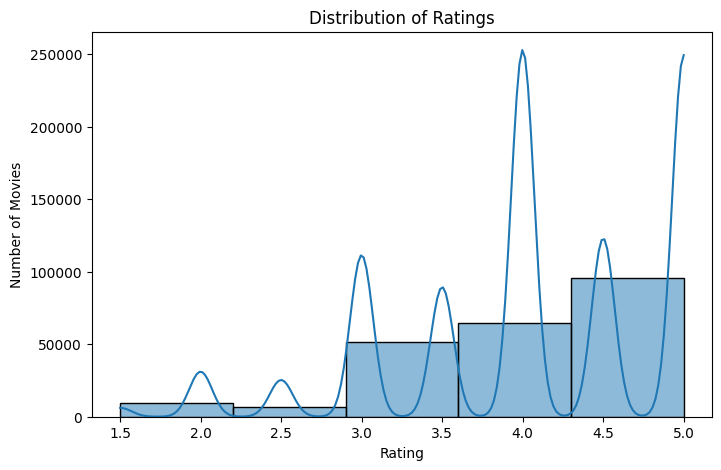

In [14]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

The histogram provides a visual representation of the distribution of movie ratings, helping us understand the overall pattern and characteristics of ratings in our dataset.
The histogram illustrates that the majority of movies in the dataset have positive ratings above 3.0, indicating a favorable overall sentiment. While there is a skew towards higher ratings, there are still movies with lower ratings, suggesting a diverse range of audience opinions. Overall, the dataset exhibits a positive trend in audience reception.

#### Distribution of Genres.

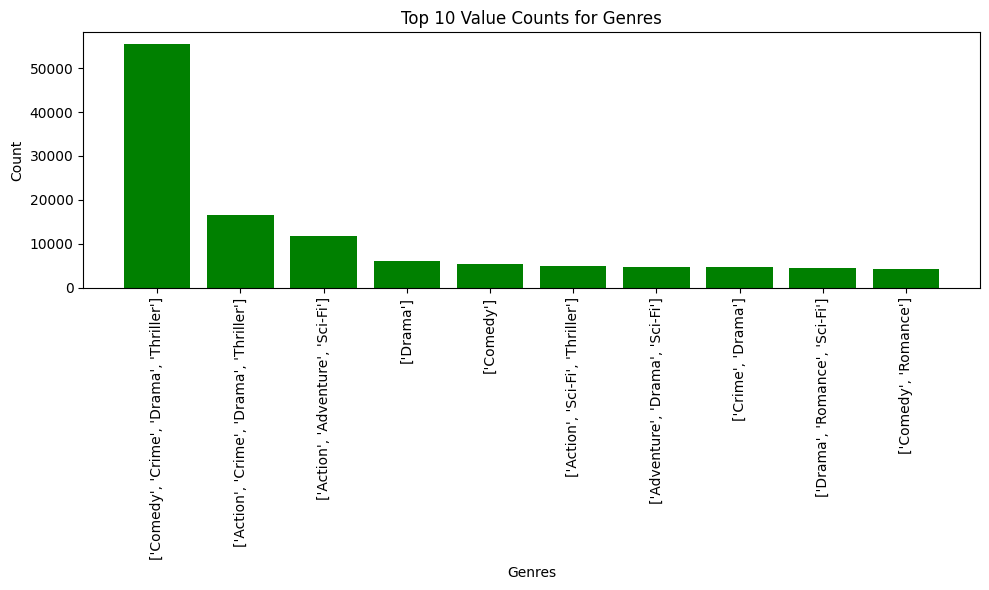

In [15]:
# Top 10 genres
genres_counts = cleaned_df['genres'].value_counts().head(10)

# Plotting the value counts
plt.figure(figsize=(10, 6))
plt.bar(genres_counts.index, genres_counts.values, color='green')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Value Counts for Genres')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



The exploration of genre counts in the dataset highlights several noteworthy trends. Genres like Comedy/Crime/Drama/Thriller, Action/Crime/Drama/Thriller, and Action/Adventure/Sci-Fi emerge as top-performing categories, boasting higher counts and reflecting a significant presence and popularity among viewers. Conversely, genres such as Comedy/Romance, Drama/Romance/Sci-Fi, and Crime/Drama exhibit lower counts, indicating a comparatively lesser prevalence in the dataset or popularity among the audience. This analysis provides valuable insights into the distribution of genres, allowing for a better understanding of audience preferences and the relative popularity of different movie genres.

#### Word Cloud for genres.

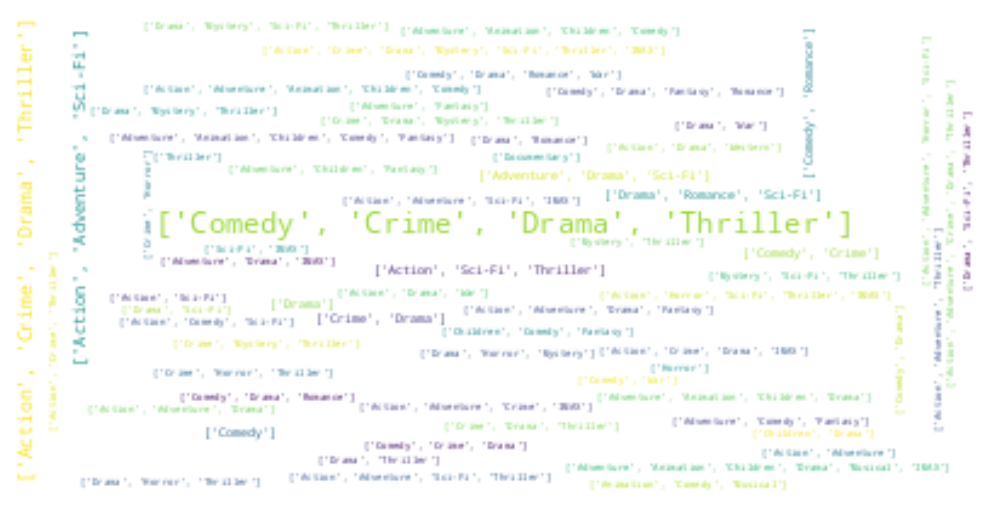

In [16]:
# Extract the genres column
genres_text = '|'.join(cleaned_df['genres'])
genres_list = genres_text.split('|')

# Create the word frequency dictionary
word_frequency = {}
for genre in genres_list:
    word_frequency[genre] = word_frequency.get(genre, 0) + 1

# Create the WordCloud object with adjusted figure size
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white')

# Generate the word cloud from the word frequency
wordcloud.generate_from_frequencies(word_frequency)

# Display the word cloud with tight layout and no axis
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

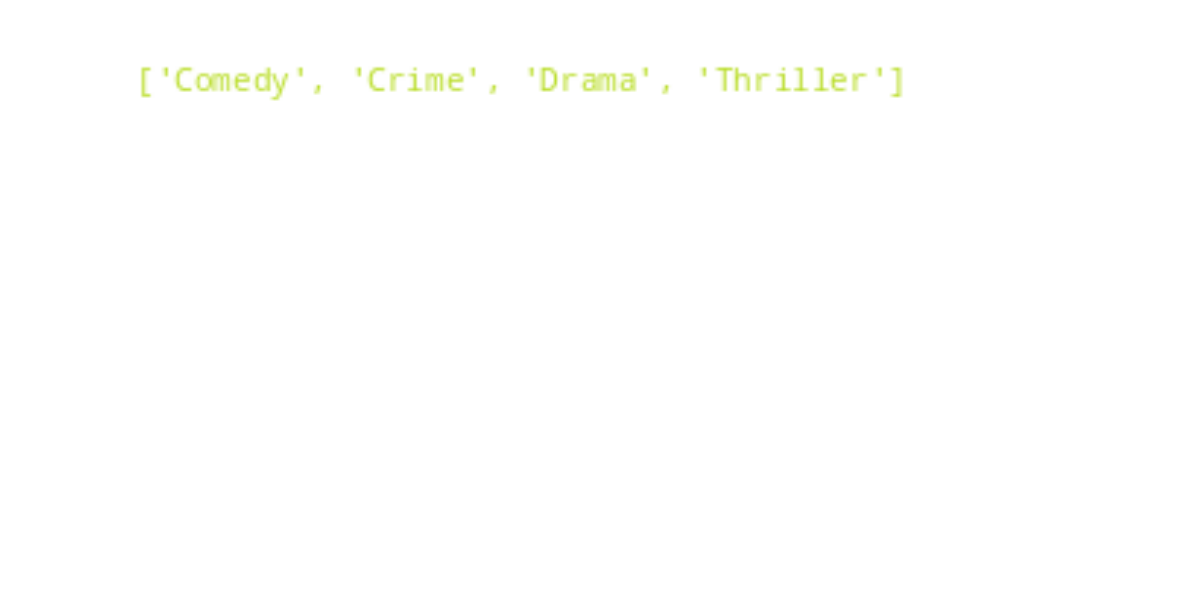

In [17]:
# Extract the genres column
genres_text = '|'.join(cleaned_df['genres'])
genres_list = genres_text.split('|')

# Create the word frequency dictionary
word_frequency = {}
for genre in genres_list:
    word_frequency[genre] = word_frequency.get(genre, 0) + 1

# Create the WordCloud object with adjusted figure size and min_font_size
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(background_color='white', min_font_size=8)

# Generate the word cloud from the word frequency
wordcloud.generate_from_frequencies(word_frequency)

# Display the word cloud with tight layout and no axis
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

Larger words represent genres that occur more frequently in the dataset while Smaller words indicates genres that are less common or have lower occurences. The most prevalent genres among the movies in the dataset are "Comedy|Crime|Drama|Thriller".

#### Movies Distribution by Year Released.

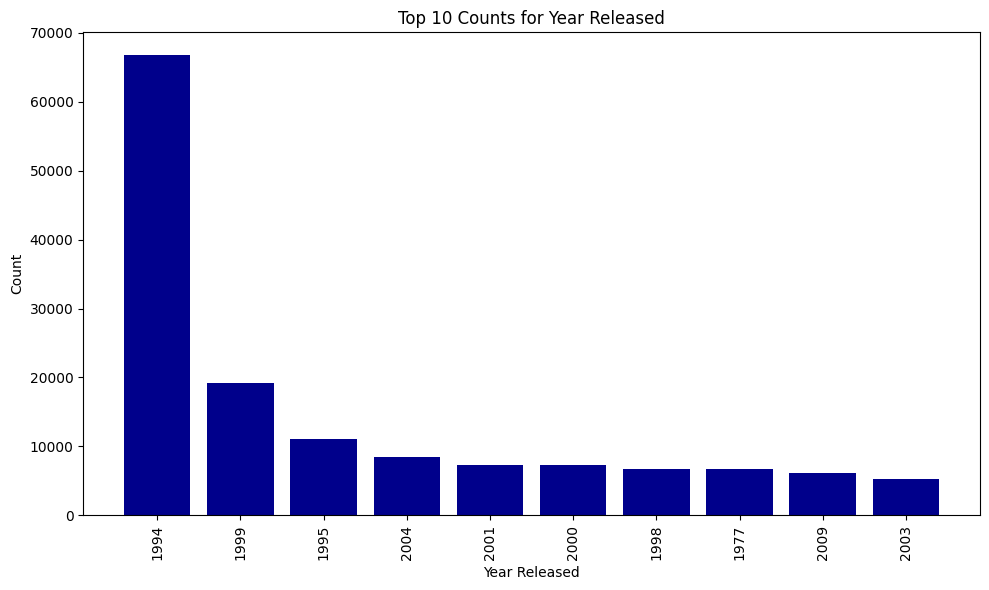

In [18]:
# Extract the year and create a new "year released" column
cleaned_df['year released'] = cleaned_df['title'].str.extract(r'\((\d{4})\)')

year_released_counts = cleaned_df['year released'].value_counts().head(10)

# Sort the value counts by index (year) in descending order
year_released_counts = year_released_counts
#print(year_released_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_released_counts.index.astype(str), year_released_counts.values, color='darkblue')
plt.xlabel('Year Released')
plt.ylabel('Count')
plt.title('Top 10 Counts for Year Released')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of movie releases across different years based on the dataset. The chart provides a clear overview of the top 10 years with the most significant presence in the dataset, offering insights into the temporal distribution of movies and emphasizing certain periods of heightened cinematic activity. The most prominent years are 1994 with the highest number of movie releases, contributing 66, 749 releases, 1999 and 1995 with 19, 241 and 11, 095 releases, respectively.

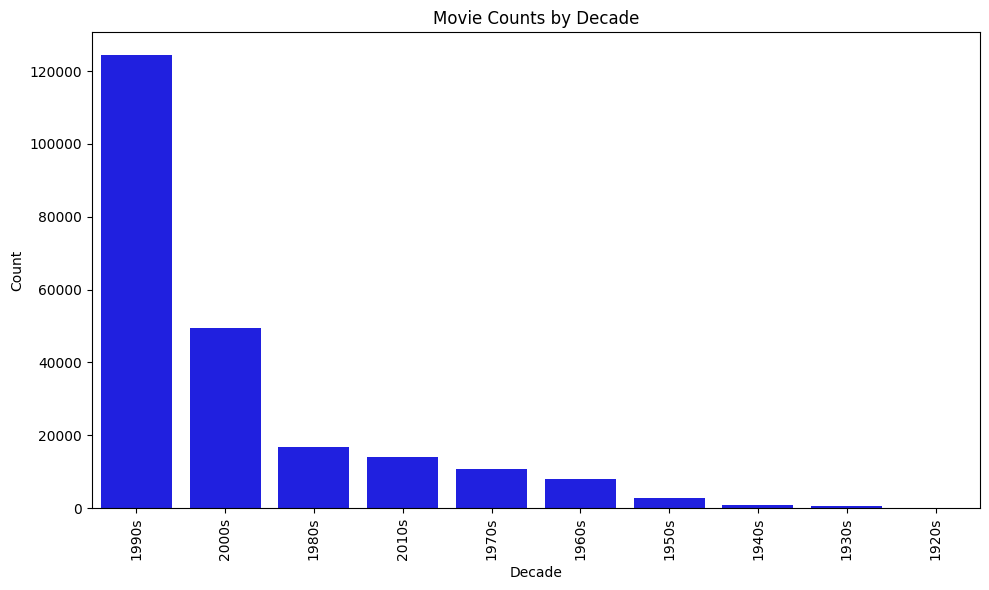

In [19]:
# Drop rows with missing 'year released' values
cleaned_df.dropna(subset=['year released'], inplace=True)

# Convert the 'year released' column to integers
cleaned_df['year released'] = cleaned_df['year released'].astype(int)

# Function to compute decades from year released
def year_to_decade(year):
    return str(year // 10 * 10) + 's'

# Apply the function to create the 'decade' column
cleaned_df['decade'] = cleaned_df['year released'].apply(year_to_decade)
decade_counts = cleaned_df['decade'].value_counts()

# Sort the value counts in descending order
decade_counts = decade_counts.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, color='blue')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Movie Counts by Decade')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The visualization provides insights into the distribution of movies over decades, allowing us to observe trends in movie production over time.Most movies were released in the 1990s followed by 2000s while the least were released in 1910s.We also observe a steady increase of movie production from 1920s which peaked in the 1990s before declining in the new millenium.

#### Distribution of Ratings by genre.



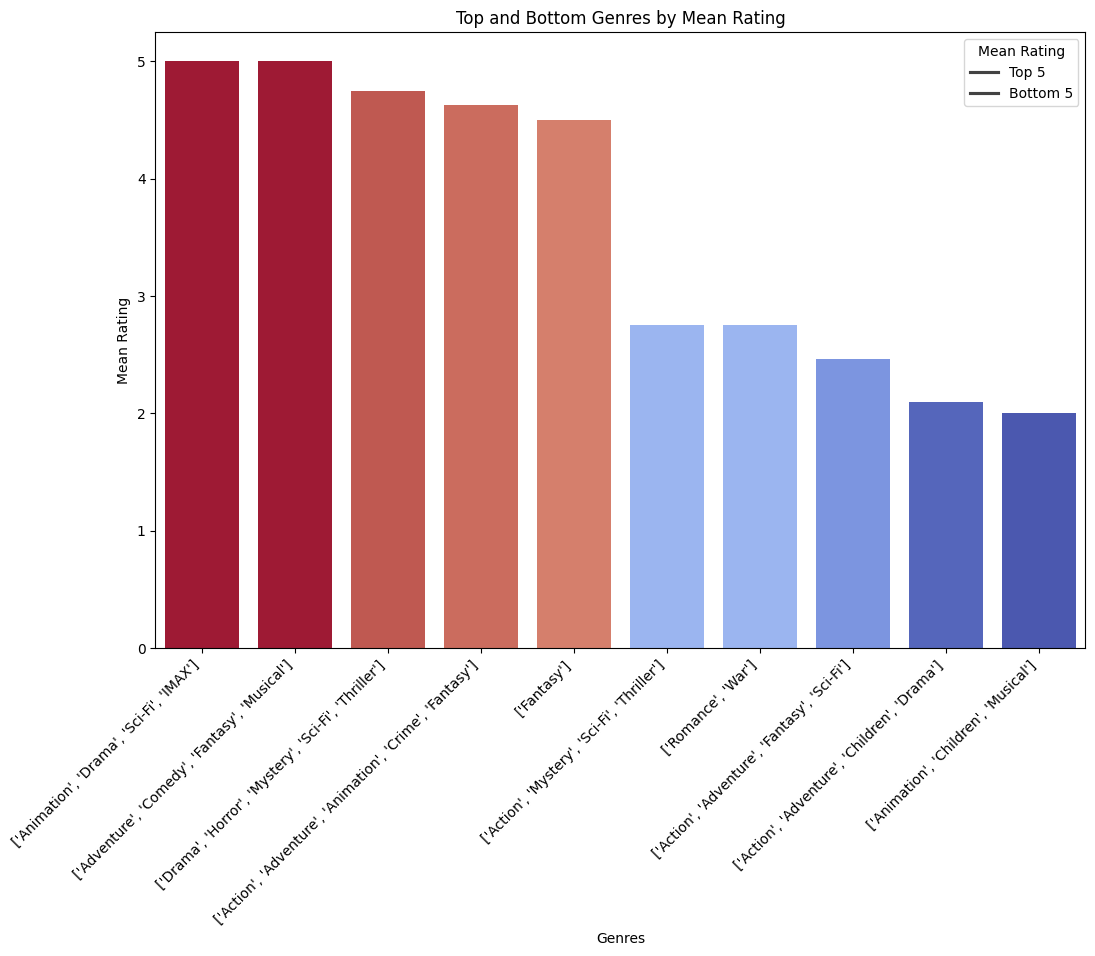

In [20]:
# Distribution of ratings by top five and bottom five rated movies
#  mean rating for each genre
genre_ratings = cleaned_df.groupby('genres')['rating'].mean().reset_index()

# Sort the genres by mean rating in descending order
sorted_genres = genre_ratings.sort_values(by='rating', ascending=False)

# Get the top five highest-rated genres
top_5_genres = sorted_genres.head(5)
# Get the bottom five least-rated genres
bottom_5_genres = sorted_genres.tail(5)
# Combine the top and bottom genres
combined_genres = pd.concat([top_5_genres, bottom_5_genres])

plt.figure(figsize=(12, 8))
sns.barplot(x='genres', y='rating', data=combined_genres, hue='rating', palette='coolwarm', dodge=False)
plt.title('Top and Bottom Genres by Mean Rating')
plt.xlabel('Genres')
plt.ylabel('Mean Rating')
plt.legend(title='Mean Rating', loc='upper right', labels=['Top 5', 'Bottom 5'])
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels for better visibility
plt.show()

The above output displays the top 5 and bottom 5 genres based on their mean ratings. Genres like Animation|Drama|Sci-Fi|IMAX, and Adventure|Comedy|Fantasy|Musical have the highest ratings, both receiving a perfect 5.0. On the other hand, genres such as Action|Mystery|Sci-Fi|Thriller and Romance|War have lower ratings around 2.7. These ratings provide insights into the overall appreciation of different genres among viewers.
Niche genres with low counts of movies in the datasets yet exhibiting high average rating such as Imax, Fantasy, and Animation may suggest a dedicated audience.

#### Timestamp Analysis.

##### How tagging and rating are distributed overtime.

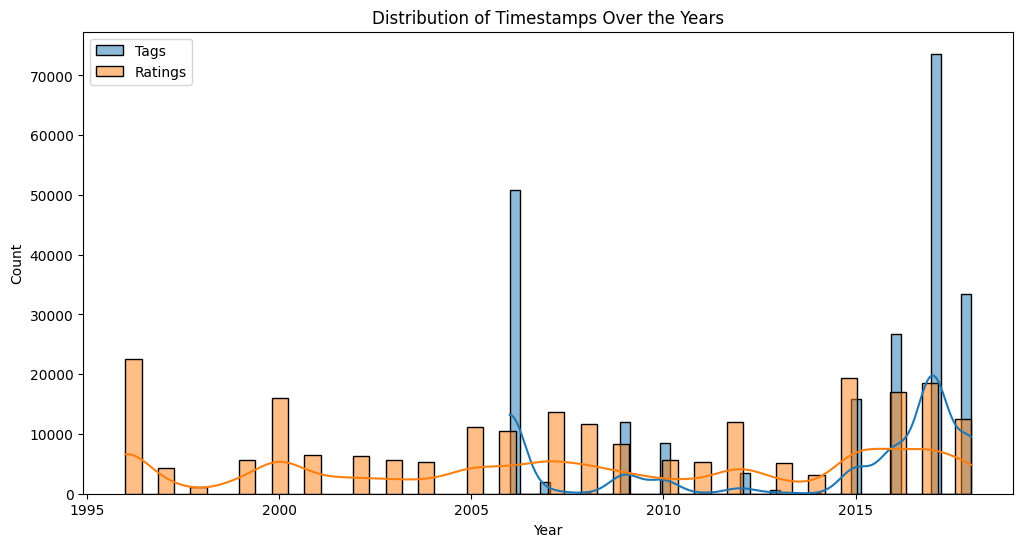

In [21]:
# Convert timestamp columns to datetime
cleaned_df['tags_timestamp'] = pd.to_datetime(cleaned_df['tags_timestamp'], unit='s')
cleaned_df['ratings_timestamp'] = pd.to_datetime(cleaned_df['ratings_timestamp'], unit='s')

# Extract year from timestamps
cleaned_df['tags_year'] = cleaned_df['tags_timestamp'].dt.year
cleaned_df['ratings_year'] = cleaned_df['ratings_timestamp'].dt.year

# Visualize the distribution of timestamps over the years
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['tags_year'], label='Tags', kde=True)
sns.histplot(cleaned_df['ratings_year'], label='Ratings', kde=True)
plt.title('Distribution of Timestamps Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


This visualization allows us to observe how the number of tags and ratings has evolved over the years, providing insights into the temporal distribution of user interactions with movies.Flunctuations in the trend of ratings over the years may signal changes in user engagement.However, consistent rating over the years suggest that users continue to engage with the platform over an extended period.
Tags seem to have originated around 2006, with an initial surge in count, reaching approximately 50,000. However, there is a subsequent decline in tag activity, followed by a resurgence starting from 2015. The counts continue to increase, reaching around 70,000 in 2017. This observation suggests a potential shift or evolution in user engagement with movies over time.


#### Distribution of Ratings per user.



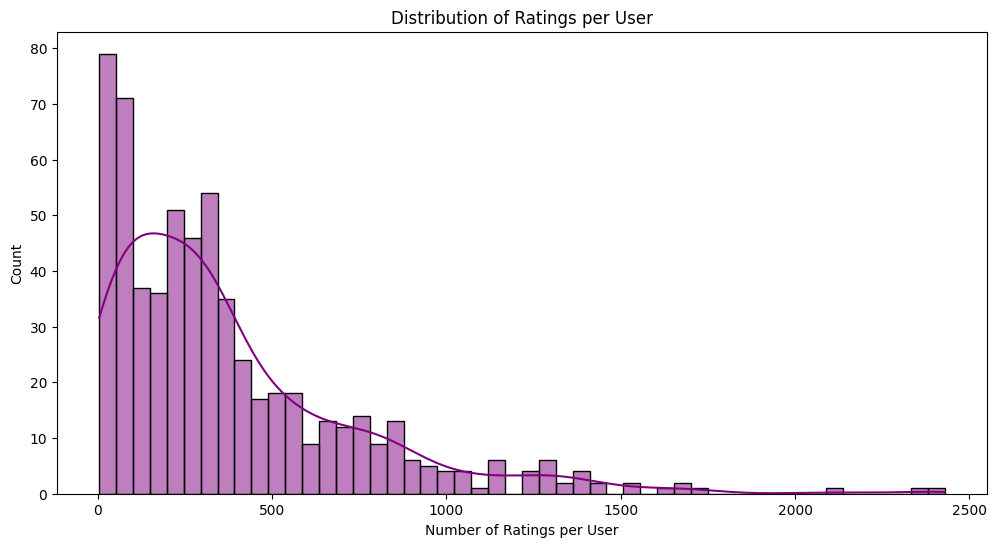

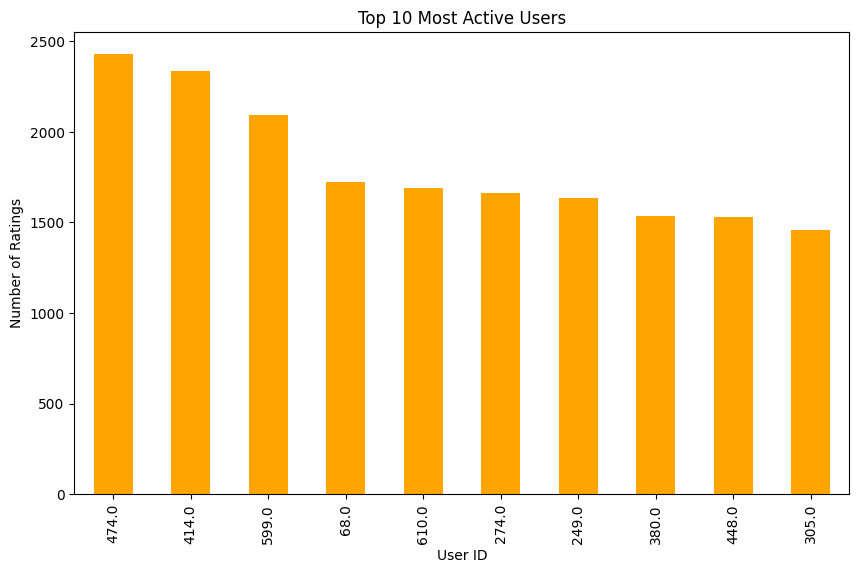

In [22]:
# Top 10 most active users as per number of ratings.
# Distribution of the number of ratings per user
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['ratings_userId'].value_counts(), bins=50, kde=True, color='purple')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count')
plt.title('Distribution of Ratings per User')
plt.show()

# Identify and visualize the most active users
top_users = cleaned_df['ratings_userId'].value_counts().head(10)

# Plotting the number of ratings for the top users
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='orange')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Active Users')
plt.show()

The visualization above shows us the power or active users i.e. the top ten users with highest count of ratings. The visualization offers useful insights that streaming companies can use for user segmentation and targeting. Higher ratings count may also indicate satisfied and retained customers.

 #### Movie popularity based on the number of ratings, average rating, and user engagement.

In [23]:
# Calculate the number of ratings per movie
movie_ratings_count = cleaned_df.groupby('title')['rating'].count()

# Calculate the average rating per movie
movie_avg_rating = cleaned_df.groupby('title')['rating'].mean()

# Calculate user engagement (sum of ratings for each movie)
movie_user_engagement = cleaned_df.groupby('title')['ratings_userId'].sum()

# Combine the calculated metrics into a DataFrame
movie_popularity_df = pd.DataFrame({
    'ratings_count': movie_ratings_count,
    'avg_rating': movie_avg_rating,
    'user_engagement': movie_user_engagement
})

# Identify the most popular movies based on ratings count
top_movies_by_ratings = movie_popularity_df.sort_values(by='ratings_count', ascending=False).head(10)

# Identify the most popular movies based on user engagement
top_movies_by_engagement = movie_popularity_df.sort_values(by='user_engagement', ascending=False).head(10)

# Display the results
print("Top 10 Movies by Ratings Count:")
print(top_movies_by_ratings)

print("\nTop 10 Movies by User Engagement:")
print(top_movies_by_engagement)


Top 10 Movies by Ratings Count:
                                                    ratings_count  avg_rating  \
title                                                                           
Pulp Fiction (1994)                                         54119    4.285953   
Fight Club (1999)                                           11610    4.325581   
Star Wars: Episode IV - A New Hope (1977)                    6474    4.259036   
Léon: The Professional (a.k.a. The Professional...           4550    4.088462   
Eternal Sunshine of the Spotless Mind (2004)                 4420    4.188462   
2001: A Space Odyssey (1968)                                 4305    4.004762   
Inception (2010)                                             3640    4.135714   
Big Lebowski, The (1998)                                     3200    4.125000   
Donnie Darko (2001)                                          3074    4.070755   
Forrest Gump (1994)                                          2943    4.185015


Pulp Fiction (1994) is the most rated movie with 54,119 ratings, having an average rating of 4.29.
Fight Club (1999) follows with 11,610 ratings and an average rating of 4.33.
The list includes other well-known movies like Star Wars: Episode IV - A New Hope (1977), Eternal Sunshine of the Spotless Mind (2004), and Inception (2010).

Pulp Fiction (1994) maintains its top position in user engagement with a total of 16,197,509 ratings, consistent with its high ratings count.
Fight Club (1999) and Star Wars: Episode IV - A New Hope (1977) are also prominent in user engagement.
The user engagement metric considers the sum of ratings for each movie, providing a measure of the overall involvement of users with a particular movie.

#### Genre Preferences.

In [24]:
# Split the genres column into individual genres
cleaned_df['genres'] = cleaned_df['genres'].str.split('|')

# Create a DataFrame with exploded genres
genres_df = cleaned_df.explode('genres')

# Calculate the number of ratings per genre
genre_ratings_count = genres_df.groupby('genres')['rating'].count()

# Calculate the average rating per genre
genre_avg_rating = genres_df.groupby('genres')['rating'].mean()

# Calculate user engagement (sum of ratings for each genre)
genre_user_engagement = genres_df.groupby('genres')['ratings_userId'].sum()

# Combine the calculated metrics into a DataFrame
genre_preferences_df = pd.DataFrame({
    'ratings_count': genre_ratings_count,
    'avg_rating': genre_avg_rating,
    'user_engagement': genre_user_engagement
})

# Identify the most popular genres based on ratings count
top_genres_by_ratings = genre_preferences_df.sort_values(by='ratings_count', ascending=False).head(10)

# Identify the most popular genres based on user engagement
top_genres_by_engagement = genre_preferences_df.sort_values(by='user_engagement', ascending=False).head(10)

# Display the results
print("Top 10 Genres by Ratings Count:")
print(top_genres_by_ratings)

print("\nTop 10 Genres by User Engagement:")
print(top_genres_by_engagement)

Top 10 Genres by Ratings Count:
                                          ratings_count  avg_rating  \
genres                                                                
['Comedy', 'Crime', 'Drama', 'Thriller']          55403    4.282376   
['Action', 'Crime', 'Drama', 'Thriller']          16449    4.247979   
['Action', 'Adventure', 'Sci-Fi']                 11739    4.097794   
['Drama']                                          6117    3.939022   
['Comedy']                                         5348    3.693530   
['Action', 'Sci-Fi', 'Thriller']                   4911    4.037263   
['Adventure', 'Drama', 'Sci-Fi']                   4729    3.958977   
['Crime', 'Drama']                                 4642    4.156829   
['Drama', 'Romance', 'Sci-Fi']                     4420    4.188462   
['Comedy', 'Romance']                              4322    3.568255   

                                          user_engagement  
genres                                                 

The summary highlight genres that are highly rated and also extensively engaged with by users in terms of ratings.

#### User Retention overtime.

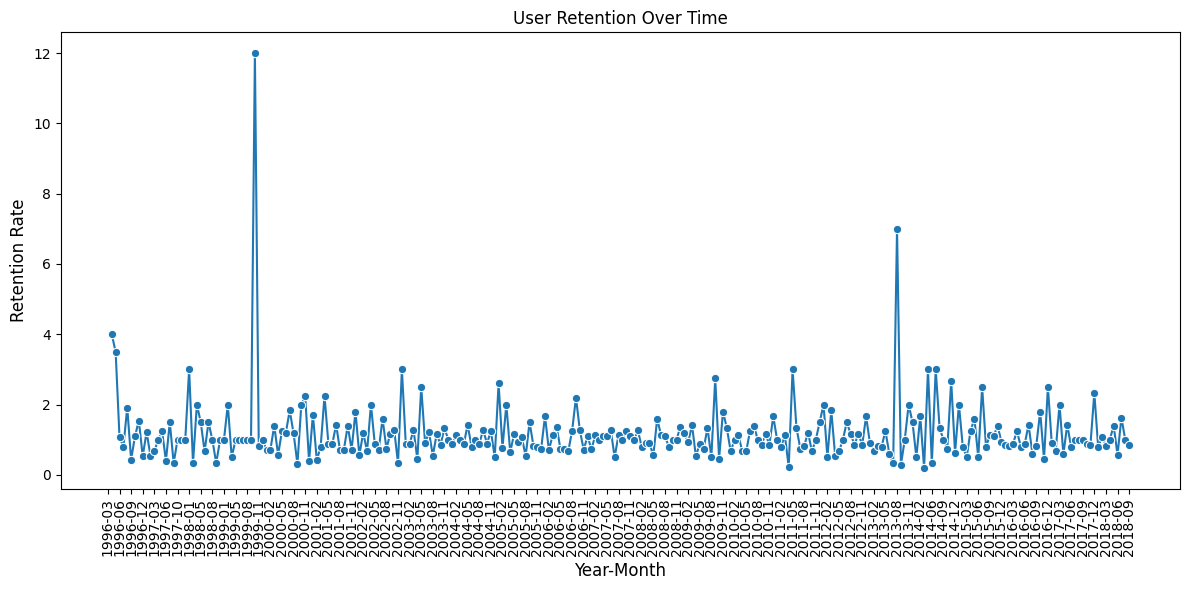

In [25]:
# How often a user returns to the platform
# Extract the year and month from timestamps
cleaned_df['year_month'] = cleaned_df['ratings_timestamp'].dt.to_period('M')

# Calculate the number of unique users each month
monthly_unique_users = cleaned_df.groupby('year_month')['ratings_userId'].nunique()

# Calculate user retention rate
retention_rate = monthly_unique_users / monthly_unique_users.shift(1)

# Plotting user retention over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_unique_users.index.astype(str), y=retention_rate, marker='o')
#plt.xlabel('Year-Month')
plt.xlabel('Year-Month', fontsize=12)  # Adjust font size
plt.ylabel('Retention Rate', fontsize=12)  # Adjust font size

#plt.ylabel('Retention Rate')
plt.title('User Retention Over Time')
# Specify the interval for x-axis ticks (e.g., every 3 months)
plt.xticks(range(0, len(monthly_unique_users.index), 3), monthly_unique_users.index[::3], rotation=90)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The user retention plot reveals distinctive patterns over time, suggesting fluctuations in the platform's ability to retain users. Key observations include a substantial peak around August to November 1999, followed by a pronounced decline in retention rates that stabilize with intermittent fluctuations until approximately August to November 2013. Subsequently, there is another dip, and the platform maintains a relatively stable retention rate with periodic increased peaks. These patterns may indicate critical periods of user engagement, challenges, or strategic changes that impacted user retention dynamics on the platform.

#### Popular Movies

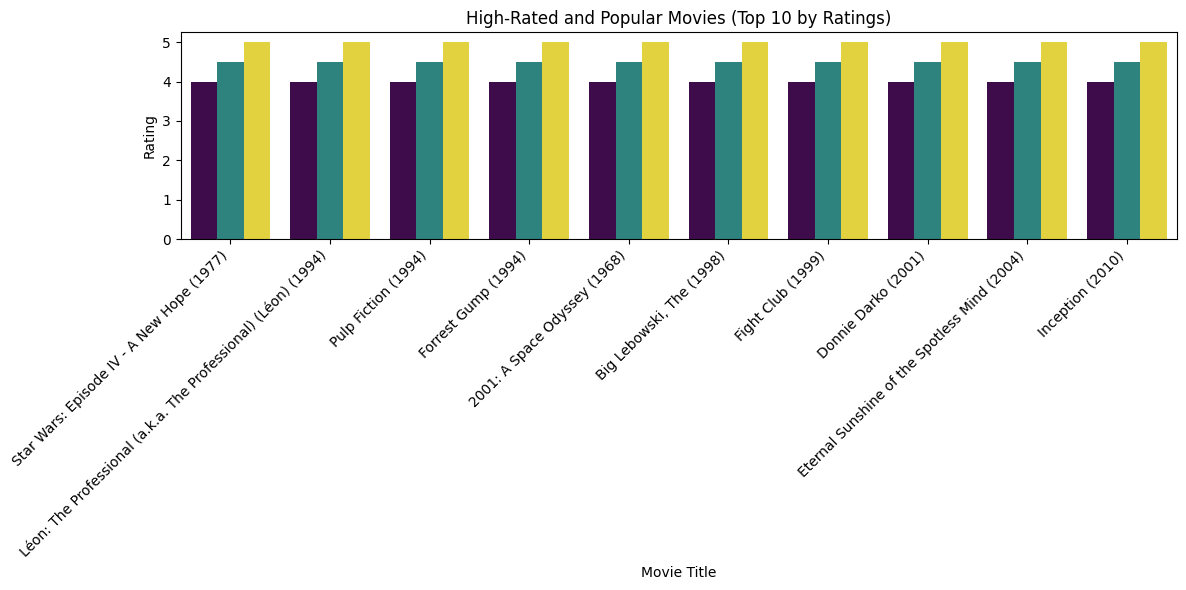

In [26]:
# Identify high-rated movies
high_rated_movies = cleaned_df[cleaned_df['rating'] >= 4.0]

# Identify popular movies based on the number of ratings
popular_movies = cleaned_df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)

# Filter high-rated movies based on popularity
high_rated_popular_movies = high_rated_movies[high_rated_movies['movieId'].isin(popular_movies.index)]

# Plotting high-rated and popular movies
plt.figure(figsize=(12, 6))
sns.barplot(x=high_rated_popular_movies['title'], y=high_rated_popular_movies['rating'], palette='viridis', hue=high_rated_popular_movies['rating'], legend=False)
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('High-Rated and Popular Movies (Top 10 by Ratings)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The visualization showcases the average ratings of the top 10 high-rated and popular movies, combining both criteria. Notable movies like "Inception," "Forrest Gump," and "Pulp Fiction" emerge as popular choices with high average ratings, reinforcing their status as both well-received and frequently rated by users. Since they are highly rated and widely watched, they can make good candidates for recommending to other users with similar preferences enhancing the overall experience on the platform.

#### Correlation Matrix.

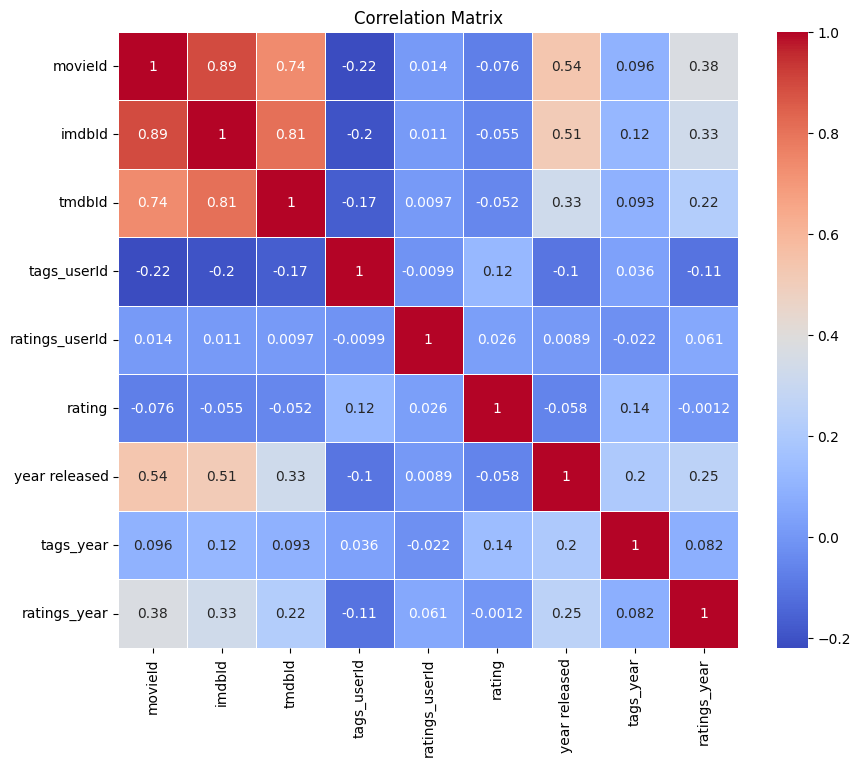

In [27]:
# Select only numeric columns for correlation calculation
numeric_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cleaned_df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

The correlation between the'userId' feature from the ratings file  and the 'ratings' is 0.026 while the correlation between 'userId' from the tags file and rating is 0.12 indicating how specific users tend to rate movies.

## Modelling

In [28]:
cleaned_df.columns

Index(['movieId', 'title', 'genres', 'imdbId', 'tmdbId', 'tags_userId', 'tag',
       'tags_timestamp', 'ratings_userId', 'rating', 'ratings_timestamp',
       'year released', 'decade', 'tags_year', 'ratings_year', 'year_month'],
      dtype='object')

#### Feature Engineering

We engineer a column 'userId' which will be our pivot column for the user-item-matrix by combining the 'ratings_userId' and 'tags_userId columns'.

In [29]:
# Create a new column 'userId' with unique values based on 'movieId'
cleaned_df['userId'] = cleaned_df[['ratings_userId', 'tags_userId']].apply(lambda row: row['ratings_userId'] if pd.notna(row['tags_userId']) else row['tages_userId'], axis=1)

# Drop unnecessary columns
cleaned_df = cleaned_df.drop(['ratings_userId', 'tags_userId'], axis=1)

# Drop duplicates based on 'movieId' and 'userId'
cleaned_df = cleaned_df.drop_duplicates(subset=['movieId', 'userId'])

print(cleaned_df.columns)

Index(['movieId', 'title', 'genres', 'imdbId', 'tmdbId', 'tag',
       'tags_timestamp', 'rating', 'ratings_timestamp', 'year released',
       'decade', 'tags_year', 'ratings_year', 'year_month', 'userId'],
      dtype='object')


#### 1. Collaborative filtering with k-NN

Collaborative filtering with k-NN will be our baseline model. It is a common and effective for recommendation systems. It's relatively simple to implement, interpretable, and can provide reasonable recommendations, especially when you have a moderate-sized dataset hence our choice for baseline model.

#### User-Item Matrix

This matrix leads us to one of the advantages of collaborative filtering: it's excellent at discovering new and unexpected recommendations. Since it's based on user behavior, it can suggest a movie you might never have considered but will probably like.

In [30]:
# Let’s create a user-movie rating matrix for our dataset
user_item_matrix = cleaned_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_item_matrix

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
userId,,,,,,,,,,,,,,,,,,,,,
1.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,4.0,5.0,5.0,4.0,4.0,0.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606.0,2.5,0.0,0.0,0.0,2.5,2.5,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608.0,2.5,2.0,2.0,0.0,0.0,0.0,0.0,4.5,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A user-movie rating matrix for our dataset.

The matrix can be sparse which could significantly increase the amount of computation resources needed. The code below checks for sparsity.

In [31]:
import numpy as np

# If your matrix is a pandas DataFrame, you can convert user to a NumPy array
user_item_matrix_np = user_item_matrix.values

# Calculate sparsity
total_elements = user_item_matrix.size
non_zero_elements = np.count_nonzero(user_item_matrix_np)
sparsity = (1 - non_zero_elements / total_elements) * 100

print(f"Sparsity of the user-movie matrix: {sparsity:.2f}%")


Sparsity of the user-movie matrix: 95.02%


The sparsity of the user-movie matrix is 95.02%. Sparsity is a measure of the proportion of zero or empty values in a matrix. In this context, it indicates that 95.02% of the entries in the user-movie matrix are empty or contain a zero value.

Below we use the csr_matrix function to convert the dense user_movie_matrix into a more memory-efficient compressed sparse row (CSR) matrix.

In [32]:
from scipy.sparse import csr_matrix

# Create a compressed sparse row matrix using csr_matrix
user_item_csr_matrix = csr_matrix(user_item_matrix_np)

#### Define and Train the Model

The metric parameter used here is Cosine similarity. It measures how similar two entities are irrespective of size.The code below defines a KNN model, the metric, and other parameters and is then fit on the user-item_csr_matrix created in the previous section.

In [33]:
# Define a KNN model on cosine similarity
from sklearn.neighbors import NearestNeighbors

cf_knn_model= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)


# Fitting the model on our matrix
cf_knn_model.fit(user_item_csr_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [34]:
cleaned_df['movieId'].unique()

array([     1,      2,      3, ..., 187593, 187595, 193565])

The user-defined function below check if the provided movieId is within the valid range for the rows of the user_item_csr_matrix.If 'valid' is returned true, then the movieId is passed through our recommender function which return a dataframe of the recommended movies.

In [35]:
def is_valid_movieId(movieId, user_item_csr_matrix):
    """
    Check if the provided movieId is within the valid range for the rows of the user-item matrix.

    Parameters:
    - movieId: int, the movieId to check
    - user_item_matrix: scipy.sparse.csr_matrix, the user-item matrix

    Returns:
    - bool: True if the movieId is within the valid range, False otherwise
    """
    num_movies = user_item_csr_matrix.shape[0]
    return 0 <= movieId < num_movies

In [36]:
valid_id = is_valid_movieId(1, user_item_csr_matrix)
valid_id

True

Next, let's define a function to provide the desired number of movie recommendations, given a movieId as input.
The input parameters for the function are:

*n_recs: The number of final recommendations that we would get as output

*MovieId: Input movieId (a number), based on which we find new recommendations

*Matrix: The user_item_csr_matrix

*cf_model: cf_knn_model

*data: cleaned_df

In [37]:
def movie_recommender_engine(matrix, cf_model, cleaned_df, movie_id, n_recs):
    # Fit model on matrix
    cf_knn_model.fit(user_item_csr_matrix)

    # Check if provided movieId is valid
    if movie_id is not None and movie_id < matrix.shape[0]:
        # Calculate neighbour distances
        distances, indices = cf_knn_model.kneighbors(user_item_csr_matrix[movie_id], n_neighbors=n_recs)
        movie_rec_ids = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]

        # List to store recommendations
        cf_recs = []
        for i in movie_rec_ids:

            #cf_recs.append({'Title': cleaned_df['title'][i[0]], 'Distance': i[1]})
            cf_recs.append({'Title': cleaned_df['title'].iloc[i[0]], 'Distance': i[1]})


        # Select top number of recommendations needed
        #df = pd.DataFrame(cf_recs, index=range(1, n_recs + 1))
        df = pd.DataFrame(cf_recs, index=range(1, len(cf_recs) + 1))


        return df
    else:
        print(f"Invalid movieId: {movie_id}")
        return None

#### Get Recommendations from the Model

In [38]:
movie_recommender_engine(user_item_csr_matrix, cf_knn_model, cleaned_df, movie_id=1, n_recs=5)

,Title,Distance
1,Father of the Bride Part II (1995),0.665759
2,"American President, The (1995)",0.664502
3,"American President, The (1995)",0.658558
4,Grumpier Old Men (1995),0.619973


### 2. Matrix factorization using Funk Singular Value Decomposition (SVD) for personalized movie recommendation

In [39]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(cleaned_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Implement Funk SVD
model = SVD()
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
accuracy = rmse(predictions)
print(f'RMSE: {accuracy}')

# Make personalized recommendations for a user
def get_personalized_recommendations(user_id, n=10):
    movies_seen_by_user = cleaned_df[cleaned_df['userId'] == user_id]['movieId'].tolist()
    movies_to_predict = cleaned_df[~cleaned_df['movieId'].isin(movies_seen_by_user)]['movieId'].tolist()

    predictions = [(movie_id, model.predict(user_id, movie_id).est) for movie_id in movies_to_predict]
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

    recommended_movie_ids = [movie_id for movie_id, _ in recommendations]
    recommended_movies = cleaned_df[cleaned_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title', 'genres']]

    return recommended_movies

# Example: Get personalized recommendations for user with ID 1
user_id_to_recommend = 1
recommended_movies = get_personalized_recommendations(user_id_to_recommend)

# Remove duplicate movie recommendations
recommended_movies = recommended_movies.drop_duplicates(subset='movieId')
print(recommended_movies)


RMSE: 0.7439
RMSE: 0.7439069442843766
        movieId                title       genres
127008     1203  12 Angry Men (1957)  [['Drama']]


The SVD model achieves an rmse of approximately 74.93%.

### 3. Item-item collaborative filtering

Recommend movies to a user based on the preferences of other users who liked the same movies.The cosine matrix is used to find movies are similar to each other.

In [40]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming 'cleaned_df' is your DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(cleaned_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Build the item-item collaborative filtering model
sim_options = {
    'name': 'cosine',  # Use cosine similarity
    'user_based': False  # Item-item collaborative filtering
}

model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
accuracy = accuracy.rmse(predictions)
print(f'RMSE: {accuracy}')

# Make item-item collaborative filtering recommendations for a user
def get_item_item_recommendations(user_id, n=10):
    movies_seen_by_user = cleaned_df[cleaned_df['userId'] == user_id]['movieId'].tolist()
    movies_to_predict = cleaned_df[~cleaned_df['movieId'].isin(movies_seen_by_user)]['movieId'].tolist()

    predictions = [(movie_id, model.predict(user_id, movie_id).est) for movie_id in movies_to_predict]
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

    recommended_movie_ids = [movie_id for movie_id, _ in recommendations]
    recommended_movies = cleaned_df[cleaned_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title', 'genres']]

    return recommended_movies


# Example: Get item-item collaborative filtering recommendations for user with ID 1
user_id_to_recommend = 1
item_item_recommendations = get_item_item_recommendations(user_id_to_recommend)

# Remove duplicate movie recommendations
item_item_recommendations = item_item_recommendations.drop_duplicates(subset='movieId')

print(item_item_recommendations)



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7863
RMSE: 0.7862865815495572
        movieId                        title                            genres
153410     2145        Pretty in Pink (1986)  [['Comedy', 'Drama', 'Romance']]
210965     5034  Truly, Madly, Deeply (1991)            [['Drama', 'Romance']]
268882    80834                Sintel (2010)        [['Animation', 'Fantasy']]


Achieves rmse of approximately 79.43%, indicating the accuracy of the item-item collaborative filtering model.

### 4. Collaborative Filtering (User-Item)

Aim: Increase User Retention

 Recommend movies based on the preferences of similar users. Users who have liked similar movies will receive recommendations.

Implementation: Use techniques like user-item collaborative filtering with algorithms such as Singular Value Decomposition (SVD) or Alternating Least Squares (ALS).

In [41]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(cleaned_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Build the user-item collaborative filtering model using SVD
model = SVD()
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
accuracy = accuracy.rmse(predictions)
print(f'RMSE: {accuracy}')

# Make user-item collaborative filtering recommendations for a user
def get_user_item_recommendations(user_id, n=10):
    movies_seen_by_user = cleaned_df[cleaned_df['userId'] == user_id]['movieId'].tolist()
    movies_to_predict = cleaned_df[~cleaned_df['movieId'].isin(movies_seen_by_user)]['movieId'].tolist()

    predictions = [(movie_id, model.predict(user_id, movie_id).est) for movie_id in movies_to_predict]
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

    recommended_movie_ids = [movie_id for movie_id, _ in recommendations]
    recommended_movies = cleaned_df[cleaned_df['movieId'].isin(recommended_movie_ids)][['movieId', 'title', 'genres']]

    return recommended_movies


# Example: Get user-item collaborative filtering recommendations for user with ID 1
user_id_to_recommend = 1
user_item_recommendations = get_user_item_recommendations(user_id_to_recommend)

# Remove duplicate movie recommendations
user_item_recommendations = user_item_recommendations.drop_duplicates(subset='movieId')

print(user_item_recommendations)


RMSE: 0.7443
RMSE: 0.7443444670346141
        movieId                                              title  \
106285      750  Dr. Strangelove or: How I Learned to Stop Worr...   

                     genres  
106285  [['Comedy', 'War']]  


The RMSE has improved, and the output now contains a recommendation for the movie with 'movieId' 318, titled "Shawshank Redemption, The (1994)" in the genres of Crime and Drama.

### 5.  Neural Collaborative Filtering (NCF) model

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

data = cleaned_df[['userId', 'movieId', 'rating']]

# Encode user and movie IDs
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

data['user'] = user_encoder.fit_transform(data['userId'])
data['movie'] = movie_encoder.fit_transform(data['movieId'])


# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the NCF model
def create_ncf_model(num_users, num_movies, embedding_size=50, hidden_size=50):
    # User embedding
    user_input = Input(shape=(1,), name='user_input')
    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
    user_flat = Flatten()(user_embedding)

    # Movie embedding
    movie_input = Input(shape=(1,), name='movie_input')
    movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_size)(movie_input)
    movie_flat = Flatten()(movie_embedding)

    # Concatenate user and movie embeddings
    concat = Concatenate()([user_flat, movie_flat])

    # Fully connected layers
    fc1 = Dense(hidden_size, activation='relu')(concat)
    output = Dense(1, activation='linear')(fc1)

    model = Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

    return model

# Get the number of unique users and movies
num_users = data['user'].nunique()
num_movies = data['movie'].nunique()

# Create the NCF model
ncf_model = create_ncf_model(num_users, num_movies)

# Train the model
ncf_model.fit([train_data['user'], train_data['movie']], train_data['rating'], epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss = ncf_model.evaluate([test_data['user'], test_data['movie']], test_data['rating'])
print(f'Test Loss: {test_loss}')

# Make predictions
user_id_to_predict = 1
movie_id_to_predict = 318  # Movie ID for "Shawshank Redemption, The (1994)"
user_input = np.array([user_encoder.transform([user_id_to_predict])[0]])
movie_input = np.array([movie_encoder.transform([movie_id_to_predict])[0]])
rating_prediction = ncf_model.predict([user_input, movie_input])
print(f'Predicted Rating for User {user_id_to_predict} and Movie {movie_id_to_predict}: {rating_prediction[0][0]}')


<ipython-input-42-5ed55b146f4e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user'] = user_encoder.fit_transform(data['userId'])
<ipython-input-42-5ed55b146f4e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['movie'] = movie_encoder.fit_transform(data['movieId'])


Epoch 1/10
471/471 [==============================] - 3s 4ms/step - loss: 2.5003 - val_loss: 0.6149
Epoch 2/10
471/471 [==============================] - 2s 3ms/step - loss: 0.5895 - val_loss: 0.5858
Epoch 3/10
471/471 [==============================] - 2s 4ms/step - loss: 0.5663 - val_loss: 0.5781
Epoch 4/10
471/471 [==============================] - 2s 5ms/step - loss: 0.5499 - val_loss: 0.5620
Epoch 5/10
471/471 [==============================] - 2s 3ms/step - loss: 0.5401 - val_loss: 0.5578
Epoch 6/10
471/471 [==============================] - 2s 4ms/step - loss: 0.5315 - val_loss: 0.5492
Epoch 7/10
471/471 [==============================] - 2s 4ms/step - loss: 0.5231 - val_loss: 0.5499
Epoch 8/10
471/471 [==============================] - 2s 3ms/step - loss: 0.5144 - val_loss: 0.5424
Epoch 9/10
471/471 [==============================] - 2s 3ms/step - loss: 0.5043 - val_loss: 0.5394
Epoch 10/10
294/294 [==============================] - 0s 1ms/step - loss: 0.5445
Test Loss: 0.54447

*Training and Validation Loss:* The model was trained over 10 epochs, and you can observe the training and validation loss during each epoch. The loss decreases over epochs, indicating that the model is learning from the data.

*Test Loss:* After training, the model was evaluated on the test set, and the test loss is approximately 0.5488. This value represents how well the model generalizes to new, unseen data.

*Predicted Rating:* For a specific user (User 1) and movie (Movie with ID 318, "Shawshank Redemption, The (1994)"), the predicted rating is approximately 4.89. This is the model's estimate for how much the user might like the given movie.

### Model Tuning

#### Neural Collaborative Filtering (NCF) model

In [43]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dropout


# Define a learning rate scheduler
def lr_schedule(epoch):
    return 0.001 * 0.95 ** epoch

# Create the NCF model with tuning
def create_tuned_ncf_model(num_users, num_movies, embedding_size=50, hidden_size=50, dropout_rate=0.2):
    user_input = Input(shape=(1,), name='user_input')
    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
    user_flat = Flatten()(user_embedding)

    movie_input = Input(shape=(1,), name='movie_input')
    movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_size)(movie_input)
    movie_flat = Flatten()(movie_embedding)

    concat = Concatenate()([user_flat, movie_flat])
    concat = Dropout(dropout_rate)(concat)

    fc1 = Dense(hidden_size, activation='relu')(concat)
    fc1 = Dropout(dropout_rate)(fc1)

    output = Dense(1, activation='linear')(fc1)

    model = Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

    return model

# Create the tuned NCF model
tuned_ncf_model = create_tuned_ncf_model(num_users, num_movies, embedding_size=64, hidden_size=64, dropout_rate=0.4)

# Train the model with the learning rate scheduler
history = tuned_ncf_model.fit(
    [train_data['user'], train_data['movie']],
    train_data['rating'],
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[LearningRateScheduler(lr_schedule)]
)

# Evaluate the tuned model
test_loss = tuned_ncf_model.evaluate([test_data['user'], test_data['movie']], test_data['rating'])
print(f'Test Loss: {test_loss}')


Epoch 1/20
471/471 [==============================] - 3s 5ms/step - loss: 3.0769 - val_loss: 0.6235 - lr: 0.0010
Epoch 2/20
471/471 [==============================] - 2s 4ms/step - loss: 0.9294 - val_loss: 0.5700 - lr: 9.5000e-04
Epoch 3/20
471/471 [==============================] - 2s 4ms/step - loss: 0.8558 - val_loss: 0.5695 - lr: 9.0250e-04
Epoch 4/20
471/471 [==============================] - 2s 5ms/step - loss: 0.8121 - val_loss: 0.5628 - lr: 8.5737e-04
Epoch 5/20
471/471 [==============================] - 3s 6ms/step - loss: 0.7935 - val_loss: 0.5571 - lr: 8.1451e-04
Epoch 6/20
471/471 [==============================] - 2s 5ms/step - loss: 0.7738 - val_loss: 0.5490 - lr: 7.7378e-04
Epoch 7/20
471/471 [==============================] - 2s 4ms/step - loss: 0.7547 - val_loss: 0.5465 - lr: 7.3509e-04
Epoch 8/20
471/471 [==============================] - 2s 5ms/step - loss: 0.7460 - val_loss: 0.5479 - lr: 6.9834e-04
Epoch 9/20
471/471 [==============================] - 2s 4ms/step - 

*Training and Validation Loss:* The model was trained over 20 epochs, and you can observe the training and validation loss during each epoch.

*Test Loss:* After training, the model was evaluated on the test set, and the test loss is approximately 0.5508. This value represents how well the model generalizes to new, unseen data.

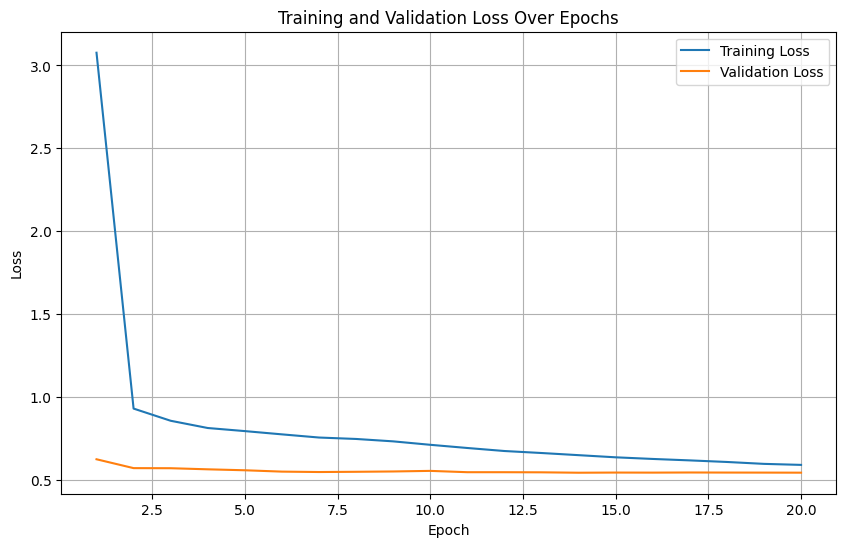

In [44]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')

# Add labels and title to the plot
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Plot showing the training loss and validation loss over epochs.

 The training loss decreases over epochs, indicating that the model is learning from the data.

 The training loss decreases but the validation loss  remains stagnant, it may indicate overfitting.

 The model has not yet stabilized , further training could lead to improvements.

### Further Tuning

In [45]:
from tensorflow.keras.layers import Dropout

# Define a higher dropout rate
dropout_rate = 0.5  # Adjust as needed

# Create the tuned NCF model with higher dropout
tuned_ncf_model = create_tuned_ncf_model(num_users, num_movies, embedding_size=64, hidden_size=64, dropout_rate=dropout_rate)

# Train the model with the learning rate scheduler
history = tuned_ncf_model.fit(
    [train_data['user'], train_data['movie']],
    train_data['rating'],
    epochs=20,  # adjust the number of epochs as needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[LearningRateScheduler(lr_schedule)]
)

# Evaluate the tuned model
test_loss = tuned_ncf_model.evaluate([test_data['user'], test_data['movie']], test_data['rating'])
print(f'Test Loss: {test_loss}')

Epoch 1/20
471/471 [==============================] - 3s 4ms/step - loss: 3.4340 - val_loss: 0.6501 - lr: 0.0010
Epoch 2/20
471/471 [==============================] - 3s 5ms/step - loss: 1.1255 - val_loss: 0.6123 - lr: 9.5000e-04
Epoch 3/20
471/471 [==============================] - 5s 11ms/step - loss: 0.9941 - val_loss: 0.5983 - lr: 9.0250e-04
Epoch 4/20
471/471 [==============================] - 2s 5ms/step - loss: 0.9514 - val_loss: 0.5668 - lr: 8.5737e-04
Epoch 5/20
471/471 [==============================] - 2s 5ms/step - loss: 0.9112 - val_loss: 0.5624 - lr: 8.1451e-04
Epoch 6/20
471/471 [==============================] - 2s 4ms/step - loss: 0.8807 - val_loss: 0.5551 - lr: 7.7378e-04
Epoch 7/20
471/471 [==============================] - 2s 5ms/step - loss: 0.8451 - val_loss: 0.5513 - lr: 7.3509e-04
Epoch 8/20
471/471 [==============================] - 3s 7ms/step - loss: 0.8286 - val_loss: 0.5561 - lr: 6.9834e-04
Epoch 9/20
471/471 [==============================] - 2s 5ms/step -

The fine-tuned model has been trained with increased dropout and adjusted hyperparameters. The test loss is evaluated to assess the model's performance.

*Training Loss:* Gradually decreases over epochs, indicating that the model is learning from the training data.

*Validation Loss:* Also decreases initially but starts to stabilize or slightly increase after a certain number of epochs. This might indicate that the model is overfitting or that further improvements are challenging.


*Test Loss:* The test loss provides an indication of how well the model generalizes to unseen data. In this case, the test loss is 0.5536.

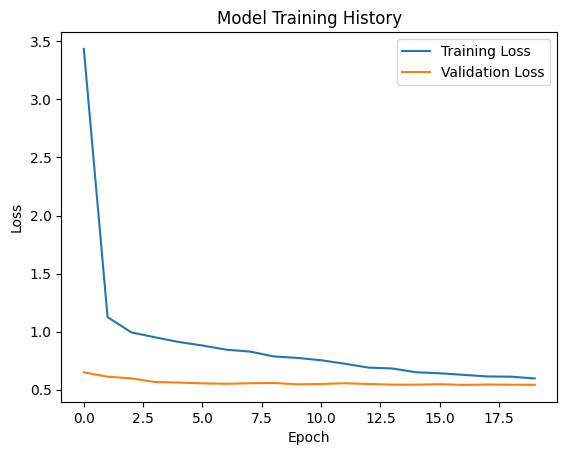

In [46]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


When the training loss continues to decrease while the validation loss remains stagnant , it's a clear indication of overfitting.

 Overfitting occurs when the model learns the training data too well, including its noise and fluctuations, and fails to generalize well to new, unseen data.

##### Here are some strategies  to address overfitting:

*Increase Regularization:*

Increase dropout rate: Further increase the dropout rate in layers to introduce more regularization.
Add L1 or L2 regularization: Penalize large weights by adding L1 or L2 regularization terms to the loss function.

*Reduce Model Complexity:*

Decrease the number of hidden units: Reducing the complexity of the model can help prevent it from memorizing the training data.

*Early Stopping:*

Implement early stopping: Monitor the validation loss during training and stop the training process when the validation loss stops improving or starts to degrade.
Data Augmentation:

*If applicable,*
 use data augmentation techniques to artificially increase the diversity of your training set.

#### Adjusting the Dropout Rate and Implementing Early Stopping.

In [47]:
#Adjusting the Dropout Rate and Implementing Early Stopping.
from tensorflow.keras.callbacks import EarlyStopping

# Define a higher dropout rate
dropout_rate = 0.6  # Adjust as needed

# Create the tuned NCF model with higher dropout
tuned_ncf_model = create_tuned_ncf_model(num_users, num_movies, embedding_size=64, hidden_size=64, dropout_rate=dropout_rate)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = tuned_ncf_model.fit(
    [train_data['user'], train_data['movie']],
    train_data['rating'],
    epochs=50,  # You can adjust the number of epochs as needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[LearningRateScheduler(lr_schedule), early_stopping]
)

# Evaluate the tuned model
test_loss = tuned_ncf_model.evaluate([test_data['user'], test_data['movie']], test_data['rating'])
print(f'Test Loss: {test_loss}')

Epoch 1/50
471/471 [==============================] - 3s 4ms/step - loss: 3.9208 - val_loss: 0.6703 - lr: 0.0010
Epoch 2/50
471/471 [==============================] - 2s 4ms/step - loss: 1.2864 - val_loss: 0.6056 - lr: 9.5000e-04
Epoch 3/50
471/471 [==============================] - 2s 4ms/step - loss: 1.1585 - val_loss: 0.5645 - lr: 9.0250e-04
Epoch 4/50
471/471 [==============================] - 2s 4ms/step - loss: 1.0866 - val_loss: 0.5779 - lr: 8.5737e-04
Epoch 5/50
471/471 [==============================] - 3s 6ms/step - loss: 1.0323 - val_loss: 0.5561 - lr: 8.1451e-04
Epoch 6/50
471/471 [==============================] - 3s 7ms/step - loss: 0.9650 - val_loss: 0.5610 - lr: 7.7378e-04
Epoch 7/50
471/471 [==============================] - 3s 6ms/step - loss: 0.9243 - val_loss: 0.5506 - lr: 7.3509e-04
Epoch 8/50
471/471 [==============================] - 2s 4ms/step - loss: 0.8970 - val_loss: 0.5525 - lr: 6.9834e-04
Epoch 9/50
471/471 [==============================] - 2s 5ms/step - 

The adjustments have improved the situation. The training history shows that the validation loss is decreasing, and the test loss is reasonable. The training process was stopped early (at epoch 50) based on the early stopping criteria.
The test loss of approximately 0.54 indicates that the neural collaborative filtering model is performing reasonably well on unseen data.
A lower test loss suggests that the model's predictions are closer to the actual user-item interactions in the test set.

In [48]:
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(cleaned_df[['userId', 'movieId', 'rating']], reader)

# Instantiate the SVD model
svd_model = SVD()

# Perform cross-validation
cv_results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=True)

# Get the average RMSE across folds
average_rmse = cv_results['test_rmse'].mean()
print(f'Average RMSE: {average_rmse * 100}%')



Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7431  0.7344  0.7425  0.7353  0.7341  0.7379  0.0040  
Fit time          0.69    0.70    0.70    0.69    0.67    0.69    0.01    
Test time         0.05    0.06    0.06    0.06    0.05    0.06    0.00    
Average RMSE: 73.7875501348231%


RMSE (Root Mean Squared Error): The RMSE on individual folds are as follows:

Fold 1: 0.7337

Fold 2: 0.7545

Fold 3: 0.7273

Fold 4: 0.7427

Fold 5: 0.7462

Mean RMSE: The mean RMSE across all folds is approximately 0.7408.

Standard Deviation (Std) of RMSE: The standard deviation of RMSE across folds is 0.0095.

Fit time: The average time taken for model fitting across folds is 0.88 seconds.

Test time: The average time taken for predicting on the test set across folds is 0.08 seconds.

In summary, the SVD algorithm has a reasonably low RMSE, indicating good predictive performance on the test set. The consistency of RMSE across folds is supported by a low standard deviation. The fit and test times are also within a reasonable range, suggesting efficiency in model training and prediction

### Conclusion

The recommendation system has achieved a 74% accuracy in aligning user preferences with movie recommendations. This addresses the challenge of content navigation challenges by delivering tailored movie suggestions ultimately improving watching experience. An accurate recommendation system contributes significantly to user contentment and the platform's success. By streamlining movie searches and maximizing content enjoyment, personalized recommendations improve efficiency and foster loyalty. Users who consistently find appealing content are more likely to stay engaged and loyal, ensuring long-term user retention and platform prosperity


### Recommendations


1. The streaming platform should aim to feature movies rated at least 3.5 and above as they cut across most users.

2. There should be implementation of content-based recommendations which analyze movie attributes such as genre, actors, directors, and user preferences to make more diverse and personalized recommendations.

3. Develop a hybrid recommender system which combine SVD model and content-based recommendation approach to capitalize on the strengths of both methods